In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import quandl
import pyfolio as pf

from tqdm import tqdm

#Split
from sklearn.model_selection import train_test_split,TimeSeriesSplit,GridSearchCV
#Feature selection / dimension reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV,SelectPercentile,mutual_info_classif
#Performance evaluation
from sklearn import metrics

# Classifiers
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression,PassiveAggressiveClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

import warnings
warnings.filterwarnings('ignore')

np.random.seed(seed=1)

In [227]:
import pandas as pd
import seaborn as sns
pd.options.display.max_rows = 999
%matplotlib inline

In [228]:
series = pd.read_csv('data/series.csv')
series

,series_id,name,frequency,units,seasonal_adjustment,Description
0,AAA10Y,Moodys Seasoned Aaa Corporate Bond Yield Relat...,Daily,Percent,Not Seasonally Adjusted,Series is calculated as the spread between Moo...
1,ASEANTOT,Import Price Index: ASEAN - All commodities,Monthly,Index Dec 2003=100,Not Seasonally Adjusted,"For more information, please see the Import/Ex..."
2,BAA10Y,Moodys Seasoned Baa Corporate Bond Yield Relat...,Daily,Percent,Not Seasonally Adjusted,Series is calculated as the spread between Moo...
3,BUSAPPWNSAUS,Business Applications for the United States,"Weekly, Ending Saturday",Number,Not Seasonally Adjusted,Business Applications (BA): The core business ...
4,BUSAPPWNSAUSYY,Business Applications for the United States,"Weekly, Ending Saturday",Percent Change from Year Ago,Not Seasonally Adjusted,Business Applications (BA): The core business ...
5,CBUSAPPWNSAUS,Business Applications from Corporations for th...,"Weekly, Ending Saturday",Number,Not Seasonally Adjusted,Business Applications from Corporations (CBA):...
6,CBUSAPPWNSAUSYY,Business Applications from Corporations for th...,"Weekly, Ending Saturday",Percent Change from Year Ago,Not Seasonally Adjusted,Business Applications from Corporations (CBA):...
7,CUUR0000SA0R,Consumer Price Index for All Urban Consumers: ...,Monthly,Index 1982-1984=100,Not Seasonally Adjusted,NaN
8,DEXCHUS,China / U.S. Foreign Exchange Rate,Daily,Chinese Yuan to One U.S. Dollar,Not Seasonally Adjusted,Noon buying rates in New York City for cable t...
9,DEXJPUS,Japan / U.S. Foreign Exchange Rate,Daily,Japanese Yen to One U.S. Dollar,Not Seasonally Adjusted,Noon buying rates in New York City for cable t...


In [229]:
train = pd.read_csv('data/observations_train.csv')
train

,series_id,date,value
0,AAA10Y,2000-01-03 00:00:00.0000000,1.17
1,AAA10Y,2000-01-04 00:00:00.0000000,1.20
2,AAA10Y,2000-01-05 00:00:00.0000000,1.16
3,AAA10Y,2000-01-06 00:00:00.0000000,1.15
4,AAA10Y,2000-01-07 00:00:00.0000000,1.17
...,...,...,...
103299,WLEMUINDXD,2017-12-27 00:00:00.0000000,13.95
103300,WLEMUINDXD,2017-12-28 00:00:00.0000000,12.77
103301,WLEMUINDXD,2017-12-29 00:00:00.0000000,23.07
103302,WLEMUINDXD,2017-12-30 00:00:00.0000000,47.60


In [231]:
train[train.value.isnull()]

,series_id,date,value
10,AAA10Y,2000-01-17 00:00:00.0000000,NaN
35,AAA10Y,2000-02-21 00:00:00.0000000,NaN
79,AAA10Y,2000-04-21 00:00:00.0000000,NaN
105,AAA10Y,2000-05-29 00:00:00.0000000,NaN
131,AAA10Y,2000-07-04 00:00:00.0000000,NaN
...,...,...,...
94337,TEDRATE,2017-09-04 00:00:00.0000000,NaN
94362,TEDRATE,2017-10-09 00:00:00.0000000,NaN
94395,TEDRATE,2017-11-23 00:00:00.0000000,NaN
94417,TEDRATE,2017-12-25 00:00:00.0000000,NaN


In [232]:
train.date = pd.to_datetime(train.date)

In [234]:
df = train.pivot_table(columns='series_id', index='date').value
df.head()

series_id,AAA10Y,ASEANTOT,BAA10Y,BUSAPPWNSAUS,BUSAPPWNSAUSYY,CBUSAPPWNSAUS,CBUSAPPWNSAUSYY,CUUR0000SA0R,DEXCHUS,DEXUSEU,...,PCUOMINOMIN,SFTPAGRM158SFRBSF,SP500,T10YIE,TEDRATE,TLAACBW027NBOG,TLBACBW027NBOG,TSIFRGHT,UNRATE,WLEMUINDXD
date,,,,,,,,,,,,,,,,,,,,,
2000-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.69
2000-01-03,1.17,NaN,1.69,NaN,NaN,NaN,NaN,NaN,8.2798,1.0155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.28
2000-01-04,1.20,NaN,1.72,NaN,NaN,NaN,NaN,NaN,8.2799,1.0309,...,NaN,NaN,NaN,NaN,0.77,NaN,NaN,NaN,NaN,253.20
2000-01-05,1.16,NaN,1.67,NaN,NaN,NaN,NaN,NaN,8.2798,1.0335,...,NaN,NaN,NaN,NaN,0.75,5628.536,5162.427,NaN,NaN,28.13
2000-01-06,1.15,NaN,1.67,NaN,NaN,NaN,NaN,NaN,8.2797,1.0324,...,NaN,NaN,NaN,NaN,0.78,NaN,NaN,NaN,NaN,25.59


In [235]:
train[train.series_id=='SP500'].date.describe(datetime_is_numeric=True)

count                             1795
mean     2014-07-23 00:00:00.000000256
min                2011-02-14 00:00:00
25%                2012-11-01 12:00:00
50%                2014-07-23 00:00:00
75%                2016-04-11 12:00:00
max                2017-12-29 00:00:00
Name: date, dtype: object

In [237]:
sp500 = train[train.series_id=='SP500']
sp500 = sp500.set_index('date')
sp500.drop('series_id', axis=1)
sp500 = sp500.value.interpolate('time')

In [238]:
sp500.head(10)

date
2011-02-14    1332.3200
2011-02-15    1328.0100
2011-02-16    1336.3200
2011-02-17    1340.4300
2011-02-18    1343.0100
2011-02-21    1322.3325
2011-02-22    1315.4400
2011-02-23    1307.4000
2011-02-24    1306.1000
2011-02-25    1319.8800
Name: value, dtype: float64

In [368]:
one_week = pd.to_timedelta('1w')
one_month = pd.to_timedelta('30d')  # room to make it more precise?
one_year = pd.to_timedelta('1y')
two_years = pd.to_timedelta('2y')

y = train[train.series_id=='SP500']
y = y.set_index('date')
y = y.interpolate('time')
min_cutoff = sp500.index.min()-two_years

X = train[train.series_id!='SP500']
X = X.set_index('date')
# Only look at dates within two years from 2011
X = X[X.index>=min_cutoff]
X = X.pivot_table(index=X.index, columns='series_id').value
X = X.interpolate('time')

# Drop cols that cannot be filled with interpolation
drop_cols = X.isnull().mean(0).sort_values(ascending=False)
drop_cols = drop_cols[drop_cols>0.1].index
X = X.drop(drop_cols, axis=1)
# Only looking at weekdays ??
# X = X.loc[X.index.dayofweek<5]
X = X.bfill()  # better ways to do this?

In [369]:
#Function to compute additional derived features
#It iterates through each existing feature and compute key statistics (rolling) for multiple lookback periods.
def derive_features(df):
    features = df.columns
    #Iterate through each column in df
    for col in tqdm(features):
        if col != 'y':
            #Daily change
            df[col+'_ret'] = df[col].pct_change()
            df[col+'_diff'] = df[col].diff()
            #Lookback periods
            lookback = [5,21, 63, 126, 252]#1 week, 1 month, 1 quarter, half year, 1 year
            
            #Compute key statistics for each lookback period
            for i in lookback:
                df[col+'_ret_' + str(i)] = df[col]/df[col].shift(i)-1
                #Return-based
                df[col+'_rolling_mean_' + str(i)] = df[col+'_ret'].rolling(i).mean()
                df[col+'_rolling_median_' + str(i)] = df[col+'_ret'].rolling(i).median()
                df[col+'_rolling_stdev_' + str(i)] = df[col+'_ret'].rolling(i).std()
                df[col+ '_rolling_skew_' + str(i)] = df[col+'_ret'].rolling(i).skew()
                df[col+ '_rolling_kurt_' + str(i)] = df[col+'_ret'].rolling(i).kurt()
                df[col+ '_rolling_min_' + str(i)] = df[col+'_ret'].rolling(i).min()
                df[col+ '_rolling_max_' + str(i)] = df[col+'_ret'].rolling(i).max()
                df[col+ '_rolling_corr_' + str(i)] = df[col+'_ret'].rolling(i).corr()
                df[col+ '_ewma_' + str(i)] = pd.DataFrame.ewm(df[col], span= i).mean()
                #Relative level
                df[col+'_rel_lvl_mean_' + str(i)] = df[col]/df[col].rolling(i).mean()
                df[col+'_rel_lvl_min_' + str(i)] = df[col]/df[col].rolling(i).min()
                df[col+'_rel_lvl_max_' + str(i)] = df[col]/df[col].rolling(i).max()                        
    return df

In [370]:
X = derive_features(X)

100%|██████████| 63/63 [00:36<00:00,  1.74it/s]


In [371]:
# Only looking at one year
min_cutoff = sp500.index.min()-one_year
X = X[X.index>=min_cutoff]
X = X.replace([np.inf, -np.inf], np.nan)

# Dropping cols with more than 1% null values
drop_cols = (X.isnull().mean(0))
drop_cols = drop_cols[drop_cols>0.01].index
X = X.drop(drop_cols, axis=1)
X = X.dropna()
X = X.reindex(y.index).ffill()
df_train = X

In [372]:
#Initialize and fit scaler
scaler = StandardScaler()
#Fit scaler using the training data
X = scaler.fit_transform(X)

In [346]:
idxs = np.random.choice(range(len(y)), 300)
MI_selector = SelectPercentile(mutual_info_classif, percentile=60)#Remove the lower 40%
MI_selector.fit(X[idxs],  y.iloc[idxs].value.values.astype(int))

SelectPercentile(percentile=60,
                 score_func=<function mutual_info_classif at 0x12b20f790>)

In [373]:
X = MI_selector.transform(X)

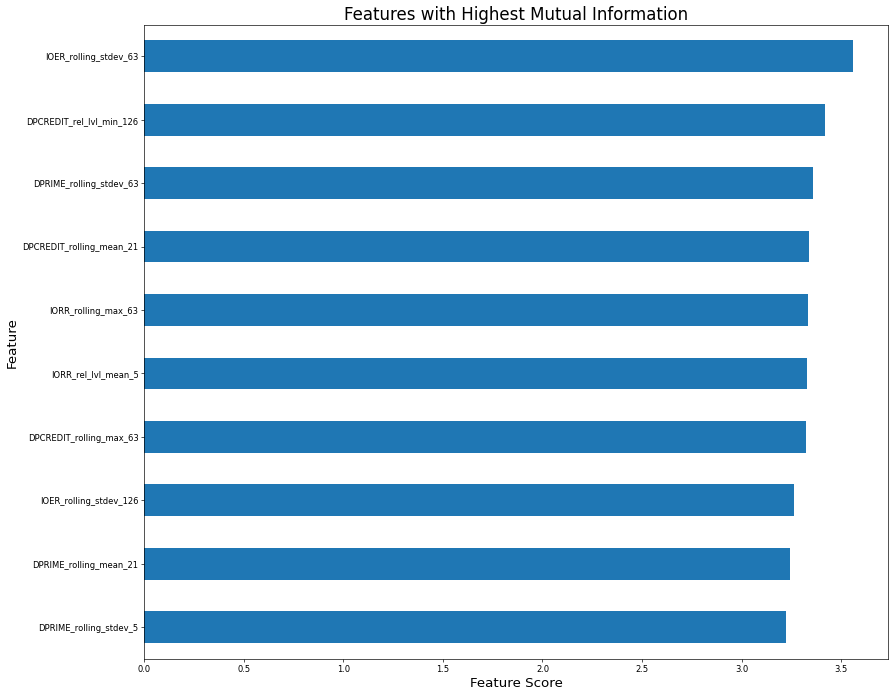

In [374]:
#Rank the features by scores
plt.figure(figsize=(16, 14), dpi= 60)
feat_scores = pd.Series(MI_selector.scores_, index=df_train.columns)
top_feat = feat_scores.nlargest(10)[::-1]
top_feat.plot(kind='barh')
plt.title("Features with Highest Mutual Information", fontsize=20)
plt.xlabel('Feature Score', fontsize=16)
plt.ylabel('Feature', fontsize=16)
# plt.show()
plt.savefig('mutual_info.png', transparent=True)

In [359]:
print(X.shape, y.shape)

(1795, 2230) (1795, 2)


Correlation Filter Result:
Number of features:  1403


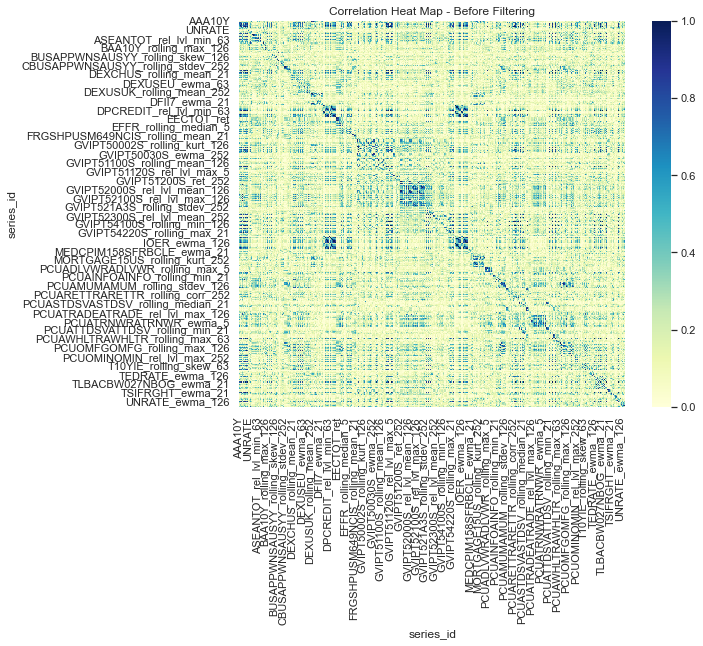

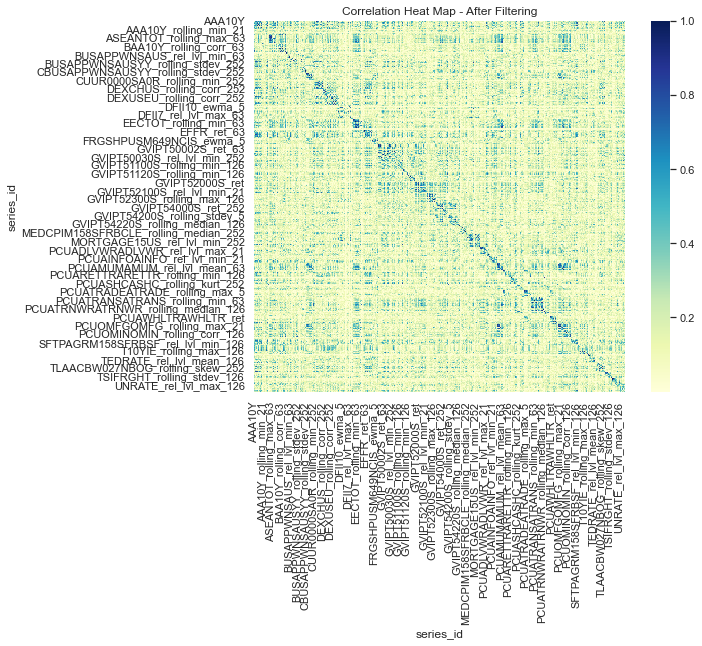

In [376]:
#Function to filter features based on correlation
#X_train and X_test inputs must be dataframes
#Corr_threshold is the cuttoff level for correlation coefficient
def correlation_filter(X_train,corr_threshold):
    
    #Compute correlation matrix
    corr_matrix = X_train.corr(method = "spearman").abs()
    
    # Select upper triangle of matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
    
    # Find index of feature columns with correlation greater than user-defined threshold
    to_drop = [column for column in upper.columns if any(upper[column] > corr_threshold)]
    
    # Drop features
    X_train_corr_filtered = X_train.drop(to_drop, axis = 1)
    
    return X_train_corr_filtered

#Helper function for heat map
def heat_map(corr_matrix,title):
    
    sns.set(font_scale = 1.0)
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr_matrix, cmap= "YlGnBu", square=True, ax = ax)
    f.tight_layout()
    ax.set_title(title)

#Initialize dataframes
df_train_MI = pd.DataFrame(data = X,
                       index = y.index,
                       columns = df_train.columns[MI_selector.get_support()])

#Filter
X_train_corr = correlation_filter(df_train_MI,0.95)

#Correlation heatmap before/after removing highly correlated features (training set)
corr_matrix_before = df_train_MI.corr(method = "spearman").abs()
corr_matrix_after = X_train_corr.corr(method = "spearman").abs()

#Plot heatmaps
heat_map(corr_matrix_before, "Correlation Heat Map - Before Filtering")
heat_map(corr_matrix_after, "Correlation Heat Map - After Filtering")

#Summary
print("Correlation Filter Result:")
print("Number of features: ",X_train_corr.shape[1])

In [386]:
corr_matrix_before.shape

(2230, 2230)